# <span style='color:Blue'>Capstone Project on Customer Electronics Sales Data Analysis</span>

## Name: Mihir Milind Jade

## Languages Used: Python 

### Library used: Numpy, Pandas, Matplotlib, Seaborn, Sckit-learn`

## Overview

In today's competitive consumer electronics market, understanding consumer behavior and predicting purchasing intent are crucial for driving sales and enhancing customer satisfaction. This dataset provides a detailed view of customer demographics, product performance, and purchasing patterns, making it anexcellent resource for analysis and predictive modeling.

## Objective

The objective of this analysis is to understand customer behavior and product performance in the competitive consumer electronics market. By examining demographics, product preferences, pricing and purchasing patterns, the study aims to identify key factors influencing purchase intent and satisfaction. Additionally a predictive model will be developed to forecast purchase intent, enabling businesses to make data-driven decisions, optimize marketing strategies, and improve customer engagement.

## Loading the Data

In [2]:
# importing library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'consumer_electronics_sales_data.csv')
df

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0
...,...,...,...,...,...,...,...,...,...
8995,14869,Smart Watches,Samsung,1041.149163,36,1,16,4,0
8996,14870,Smartphones,Samsung,1485.694311,57,0,5,1,1
8997,14871,Headphones,Samsung,2887.369597,28,0,18,4,0
8998,14872,Tablets,HP,1490.453964,38,0,4,2,1


In [4]:
df.shape

(9000, 9)

## <span style='color:red'>Observation</span>

- There are total 9000 rows and 9 columns in our dataset.

## Overview of Dataset

**ProductID:** Unique identifier for the product.

**ProductCategory:** Category of the product (e.g, Smartphones, Tabets).

**ProductBrand:** Brand of the product.

**ProductPrice:** Price of the product.

**CustomerAge:** Age of the customer.

**CustomerGender:** Gender of the Customer (binary: 0 = female, 1 = Male).

**PurchaseFrequency:** Frequency of purchase by the customer.

**CustomerSatisfaction:** Satisfaction level of customer (scale: 1-5).

**PurchaseIntent:** Indicator of the intent to purchase (binary: 0 = No, 1 = Yes).

In [9]:
df.columns

# observation
    # The target column is 'PurchaseIntent'

Index(['ProductID', 'ProductCategory', 'ProductBrand', 'ProductPrice',
       'CustomerAge', 'CustomerGender', 'PurchaseFrequency',
       'CustomerSatisfaction', 'PurchaseIntent'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             9000 non-null   int64  
 1   ProductCategory       9000 non-null   object 
 2   ProductBrand          9000 non-null   object 
 3   ProductPrice          9000 non-null   float64
 4   CustomerAge           9000 non-null   int64  
 5   CustomerGender        9000 non-null   int64  
 6   PurchaseFrequency     9000 non-null   int64  
 7   CustomerSatisfaction  9000 non-null   int64  
 8   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 632.9+ KB


## <span style='color:red'>Observation</span>

- There are no missing values in dataset.
- The data has 9000 entries.
- There are 7 numerical and 2 categorical column.

In [13]:
df.describe()

,ProductID,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,10373.500000,1527.429195,43.347000,0.508889,10.054667,2.996000,0.566444
std,2598.220545,829.900898,15.055084,0.499949,5.461328,1.405301,0.495593
min,5874.000000,100.376358,18.000000,0.000000,1.000000,1.000000,0.000000
25%,8123.750000,809.165014,30.000000,0.000000,5.000000,2.000000,0.000000
50%,10373.500000,1513.024577,43.000000,1.000000,10.000000,3.000000,1.000000
75%,12623.250000,2244.415520,56.000000,1.000000,15.000000,4.000000,1.000000
max,14873.000000,2999.852253,69.000000,1.000000,19.000000,5.000000,1.000000


## Checking Null Values

In [15]:
df.isnull().sum()

ProductID               0
ProductCategory         0
ProductBrand            0
ProductPrice            0
CustomerAge             0
CustomerGender          0
PurchaseFrequency       0
CustomerSatisfaction    0
PurchaseIntent          0
dtype: int64

## <span style='color:Blue'>Exploratory Data Analysis</span>

### Distribution of Gender

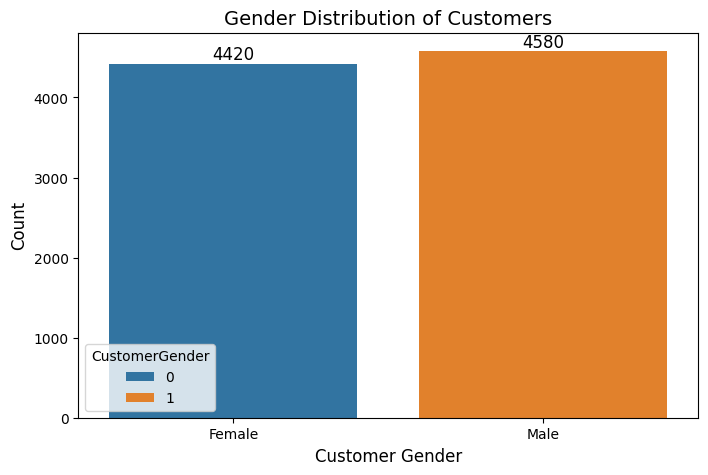

In [18]:

plt.figure(figsize=(8,5))
ax = sns.countplot(data=df,x='CustomerGender', hue='CustomerGender')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)
plt.title("Gender Distribution of Customers",fontsize=14)
plt.xlabel('Customer Gender',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks([0,1],['Female','Male'])
plt.show()

### <span style='color:red'>Observation</span>

- There are total 4580 male customers and 4420 female customers.
- Male customers are more than female customers in the dataset.

### Distribution of Product Category

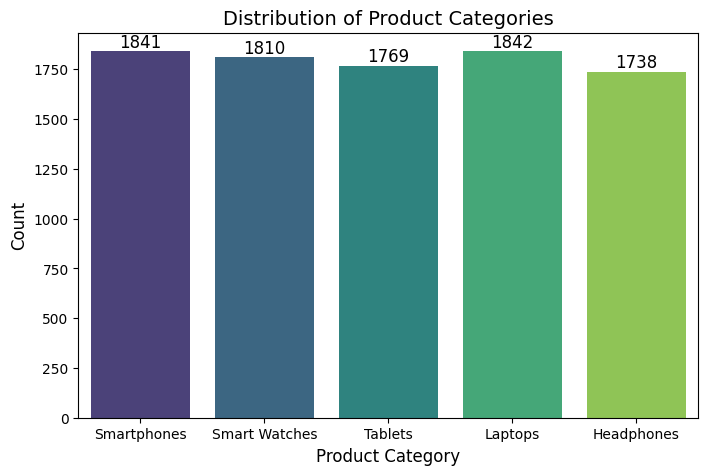

In [22]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df,x='ProductCategory', hue='ProductCategory',palette='viridis')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)
plt.title("Distribution of Product Categories",fontsize=14)
plt.xlabel('Product Category',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

### <span style='color:red'>Observation</span>

- Most customers purchase Laptops i.e 1842 and Smartphones i.e 1841. 
- Headphones are the less selling product in the store.

### Frequency of Product Brands

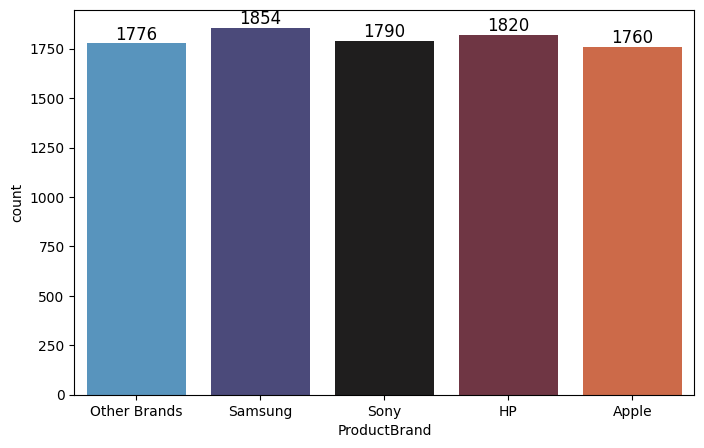

In [26]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df,x='ProductBrand', hue='ProductBrand',palette='icefire')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)

### <span style='color:red'>Observation</span>

- Samsung(1854) leads the market, followed by HP(1820).
- Apple(1760) has a relatively lower presence compared to leading brand like Samsung and Hp.

### Frequency of Purchase Intent

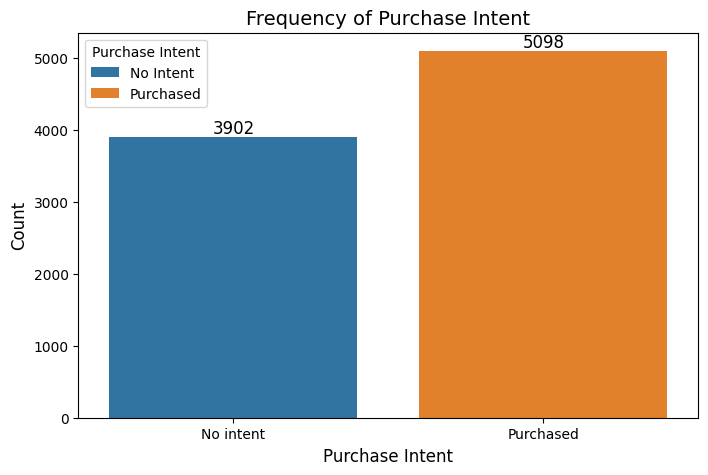

In [30]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df,x='PurchaseIntent', hue='PurchaseIntent')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)
plt.xticks([0,1],['No intent','Purchased'])
plt.title("Frequency of Purchase Intent",fontsize=14)
plt.xlabel('Purchase Intent',fontsize=12)
plt.ylabel('Count',fontsize=12)
ax.legend(labels=['No Intent', 'Purchased'], title='Purchase Intent')
plt.show()

### <span style='color:red'>Observation</span>

- Higher number of customers has intent to purchase with 5,098 instances compared to no intent with instances 3,092.
- The balance between purchase and non-purchase intent is relatively good, with a slight skew towards purchase intent.

### Distribution of Product Prices

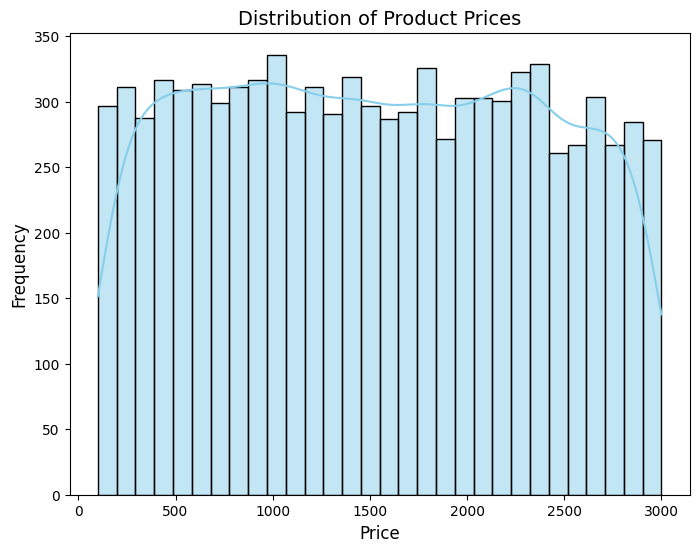

In [34]:
plt.figure(figsize=(8,6))
sns.histplot(df['ProductPrice'],bins=30,kde=True,color='skyblue',edgecolor='black')
plt.title('Distribution of Product Prices',fontsize=14)
plt.xlabel('Price',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.show()

### <span style='color:red'>Observation</span>

- The distribution of product prices appear to be relatively uniform with only slight fluctuations in the KDE curve.
- This indicates that the prices are spreaded evenly across the range, with no significant peaks.
- This could indicate a competitive market with similar 

### Distribution of Customer Satisfaction 

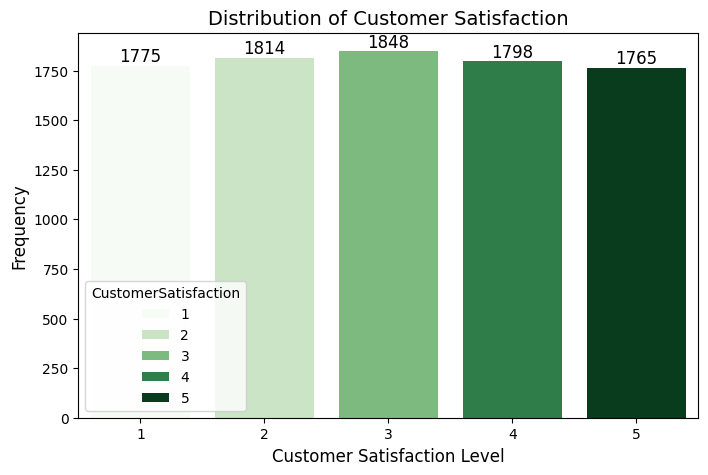

In [38]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df,x='CustomerSatisfaction',hue='CustomerSatisfaction',palette='Greens')
for container in ax.containers:
    ax.bar_label(container,label_type='edge',fontsize=12)
plt.title('Distribution of Customer Satisfaction',fontsize=14)
plt.xlabel('Customer Satisfaction Level',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.show()

### <span style='color:red'>Observation</span>

- Highest number of Customers i.e 1848 customers have given rating of 3 and 1765 customers have given rating of 5.
- This graph is also relatively uniform.

### Correlation Matrix

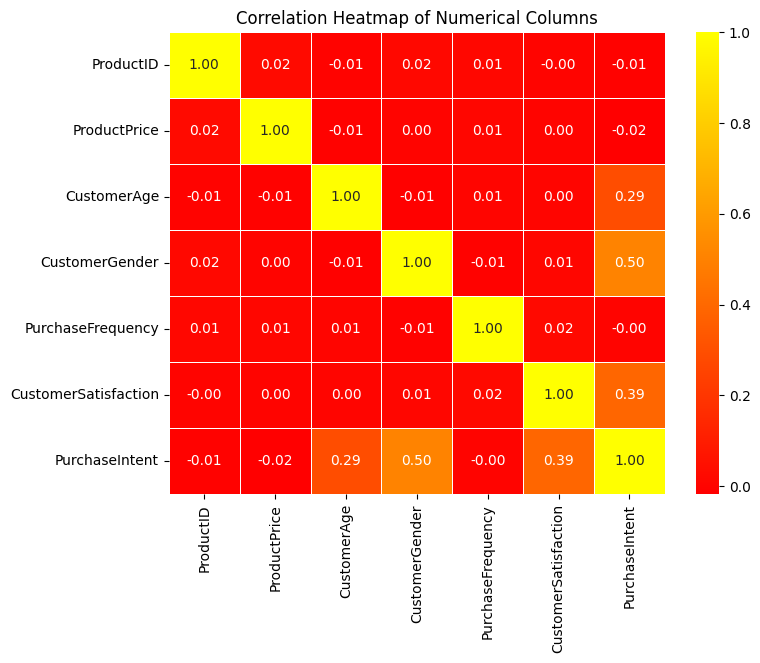

In [42]:
num_cols = df.select_dtypes(include=['number'])
corr_matrix = num_cols.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='autumn',fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

### Preprocessing Steps

#### Dropping Unnecessary Column

In [48]:
# Dropping 'ProductID' column as it is not necessary
df.drop('ProductID', axis=1, inplace=True)
df.head()

,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,Tablets,Samsung,2606.718293,63,0,1,5,1
3,Smartphones,Samsung,870.395450,63,1,10,3,1
4,Tablets,Sony,1798.955875,57,0,17,3,0


In [51]:
df.head()

,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,Tablets,Samsung,2606.718293,63,0,1,5,1
3,Smartphones,Samsung,870.395450,63,1,10,3,1
4,Tablets,Sony,1798.955875,57,0,17,3,0


#### Checking Skewness

In [55]:
df[['ProductPrice','CustomerAge','PurchaseFrequency','CustomerSatisfaction','PurchaseIntent','CustomerGender']].skew()

ProductPrice            0.029077
CustomerAge             0.003520
PurchaseFrequency      -0.001468
CustomerSatisfaction    0.004696
PurchaseIntent         -0.268201
CustomerGender         -0.035567
dtype: float64

#### Checking Outliers

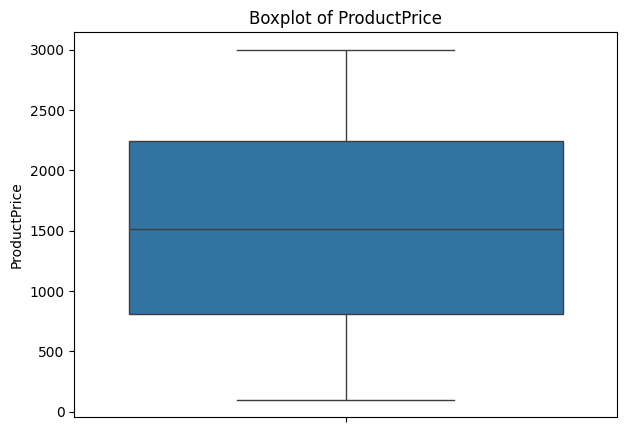

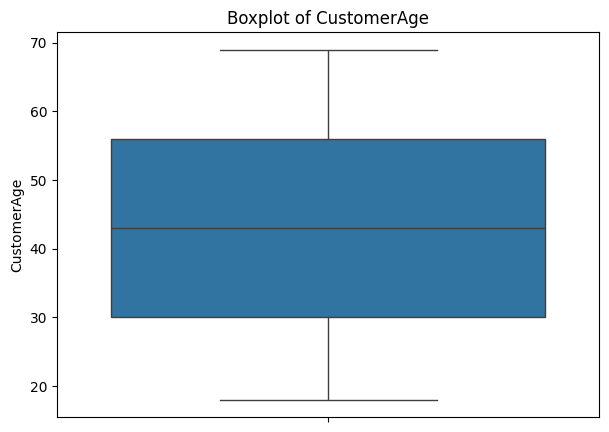

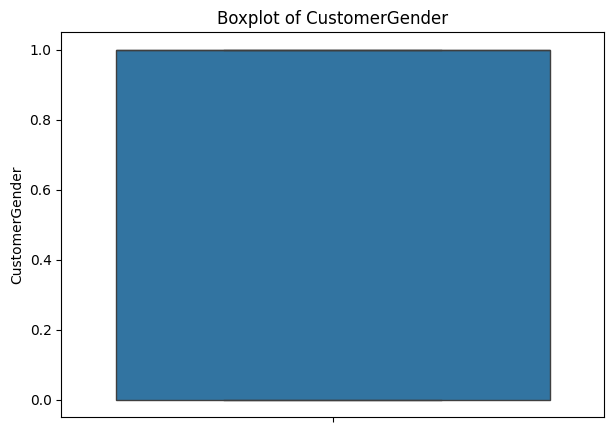

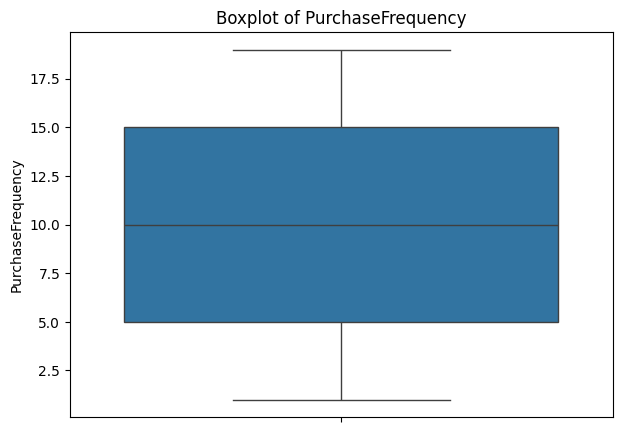

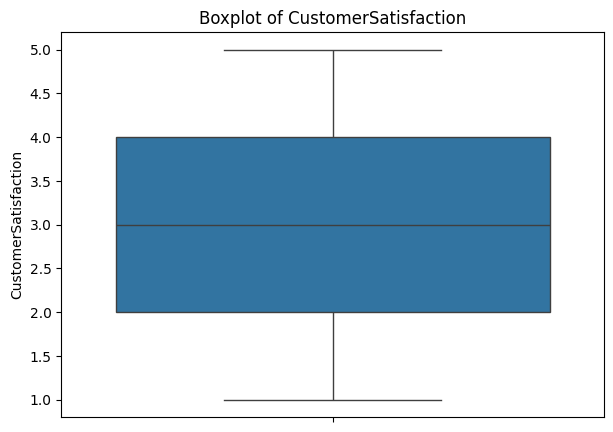

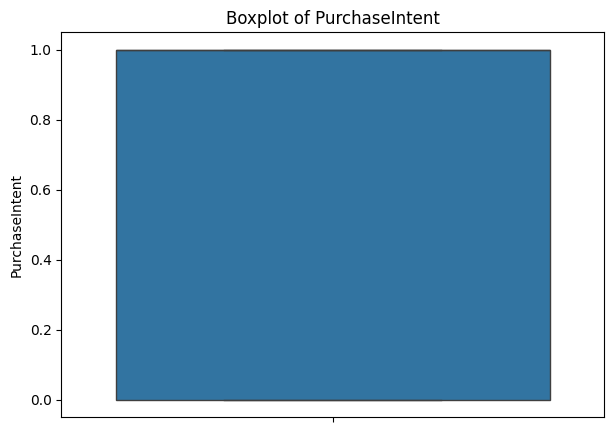

In [57]:
num_cols = df.select_dtypes(include=['number'])
for i in num_cols:
    plt.figure(figsize=(7,5))
    sns.boxplot(data=df,y=i)
    plt.title(f"Boxplot of {i}")
    plt.ylabel(i)

### <span style='color:red'>Observation</span>

- There is no outlier present in the dataset

#### Converting Categorical column to Numerical

In [63]:
df.select_dtypes(include=['object','category']).columns

Index(['ProductCategory', 'ProductBrand'], dtype='object')

In [64]:
df['ProductCategory'].unique()

array(['Smartphones', 'Smart Watches', 'Tablets', 'Laptops', 'Headphones'],
      dtype=object)

In [66]:
df['ProductBrand'].unique()

array(['Other Brands', 'Samsung', 'Sony', 'HP', 'Apple'], dtype=object)

In [67]:
# importing library

from sklearn.preprocessing import LabelEncoder

In [69]:
LE = LabelEncoder()
LE

LabelEncoder()

In [70]:
df['ProductCategory'] = LE.fit_transform(df['ProductCategory'])
df['ProductBrand'] = LE.fit_transform(df['ProductBrand'])

In [71]:
df.head()

,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,3,2,312.949668,18,0,2,1,0
1,2,3,980.389404,35,1,7,2,1
2,4,3,2606.718293,63,0,1,5,1
3,3,3,870.395450,63,1,10,3,1
4,4,4,1798.955875,57,0,17,3,0


### Training and Testing

In [74]:
x = df.drop('PurchaseIntent',axis=1)
x

,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction
0,3,2,312.949668,18,0,2,1
1,2,3,980.389404,35,1,7,2
2,4,3,2606.718293,63,0,1,5
3,3,3,870.395450,63,1,10,3
4,4,4,1798.955875,57,0,17,3
...,...,...,...,...,...,...,...
8995,2,3,1041.149163,36,1,16,4
8996,3,3,1485.694311,57,0,5,1
8997,0,3,2887.369597,28,0,18,4
8998,4,1,1490.453964,38,0,4,2


In [75]:
y = df['PurchaseIntent']
y

0       0
1       1
2       1
3       1
4       0
       ..
8995    0
8996    1
8997    0
8998    1
8999    1
Name: PurchaseIntent, Length: 9000, dtype: int64

In [77]:
# importiong library

from sklearn.model_selection import train_test_split

In [242]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

### <span style='color:blue'>Logistic Regression</span>

In [465]:
# importing library
from sklearn.linear_model import LogisticRegression

In [467]:
LR = LogisticRegression()
LR

LogisticRegression()

In [469]:
LR.fit(x_train,y_train)

C:\Users\jadem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### <span style='color:purple'>Model Prediction</span>

In [472]:
y_pred = LR.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [474]:
y_test

7940    1
1162    1
582     1
4081    0
8412    0
       ..
6764    0
1450    1
7461    1
6505    1
4927    1
Name: PurchaseIntent, Length: 2700, dtype: int64

In [476]:
error = y_test - y_pred
error

7940    0
1162    0
582     0
4081    0
8412    0
       ..
6764    0
1450    0
7461    0
6505    0
4927    0
Name: PurchaseIntent, Length: 2700, dtype: int64

#### Training Score

In [479]:
LR.score(x_train,y_train)

0.8188888888888889

#### Testing Score

In [482]:
LR.score(x_test,y_test)

0.8140740740740741

#### Accuracy of Model

In [485]:
# importing library
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [487]:
acc = accuracy_score(y_pred,y_test)*100
print(f"Accuracy of model using Logistic Regression is {acc:.2f}%")

Accuracy of model using Logistic Regression is 81.41%


In [489]:
print('Confusion Matrix')
confusion_matrix(y_test,y_pred)

Confusion Matrix


array([[ 882,  306],
       [ 196, 1316]])

In [491]:
print('Classification Report')
print(classification_report(y_pred,y_test))

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      1078
           1       0.87      0.81      0.84      1622

    accuracy                           0.81      2700
   macro avg       0.81      0.81      0.81      2700
weighted avg       0.82      0.81      0.82      2700



### <span style='color:blue'>KNN Classifier</span>

In [494]:
from sklearn.neighbors import KNeighborsClassifier

In [496]:
KNN = KNeighborsClassifier(n_neighbors=6)
KNN

KNeighborsClassifier(n_neighbors=6)

In [498]:
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

#### <span style='color:purple'>Model Prediction</span>

In [501]:
y_pred = KNN.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [503]:
y_test

7940    1
1162    1
582     1
4081    0
8412    0
       ..
6764    0
1450    1
7461    1
6505    1
4927    1
Name: PurchaseIntent, Length: 2700, dtype: int64

In [505]:
error = y_test - y_pred
error

7940    0
1162    0
582     0
4081    0
8412    0
       ..
6764   -1
1450    1
7461    1
6505    0
4927    0
Name: PurchaseIntent, Length: 2700, dtype: int64

#### Training Score

In [508]:
KNN.score(x_train,y_train)

0.7377777777777778

#### Testing Score

In [511]:
KNN.score(x_test,y_test)

0.6066666666666667

#### Accuracy of Model

In [516]:
accr = accuracy_score(y_pred,y_test)*100
print(f"Accuracy of Model using KNN Classifier {accr:.2f}%")

Accuracy of Model using KNN Classifier 60.67%


In [519]:
print("Confusion Matrix")
confusion_matrix(y_test,y_pred)

Confusion Matrix


array([[726, 462],
       [600, 912]])

In [522]:
print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.55      0.61      0.58      1188
           1       0.66      0.60      0.63      1512

    accuracy                           0.61      2700
   macro avg       0.61      0.61      0.60      2700
weighted avg       0.61      0.61      0.61      2700



### <span style='color:blue'>Decision Tree Classifier</span>

In [525]:
from sklearn.tree import DecisionTreeClassifier

In [527]:
DTC = DecisionTreeClassifier()
DTC

DecisionTreeClassifier()

In [529]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

#### <span style='color:purple'>Model Prediction</span>

In [532]:
y_pred = DTC.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [534]:
y_test

7940    1
1162    1
582     1
4081    0
8412    0
       ..
6764    0
1450    1
7461    1
6505    1
4927    1
Name: PurchaseIntent, Length: 2700, dtype: int64

In [536]:
error = y_test - y_pred
error

7940    0
1162    0
582     0
4081    0
8412    0
       ..
6764    0
1450    0
7461    0
6505    0
4927    0
Name: PurchaseIntent, Length: 2700, dtype: int64

#### Training Score

In [540]:
DTC.score(x_train,y_train)

1.0

#### Testing Score

In [543]:
DTC.score(x_test,y_test)

0.8951851851851852

#### Accuracy of Model

In [546]:
acc = accuracy_score(y_test,y_pred)*100
print(f"Accuracy score of Model using Decision Tree Classifier {acc:.2f}%")

Accuracy score of Model using Decision Tree Classifier 89.52%


In [549]:
print("Confusion Matrix")
confusion_matrix(y_test,y_pred) 

Confusion Matrix


array([[1043,  145],
       [ 138, 1374]])

In [552]:
print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1188
           1       0.90      0.91      0.91      1512

    accuracy                           0.90      2700
   macro avg       0.89      0.89      0.89      2700
weighted avg       0.90      0.90      0.90      2700



In [555]:
# Plotting Tree
from sklearn import tree

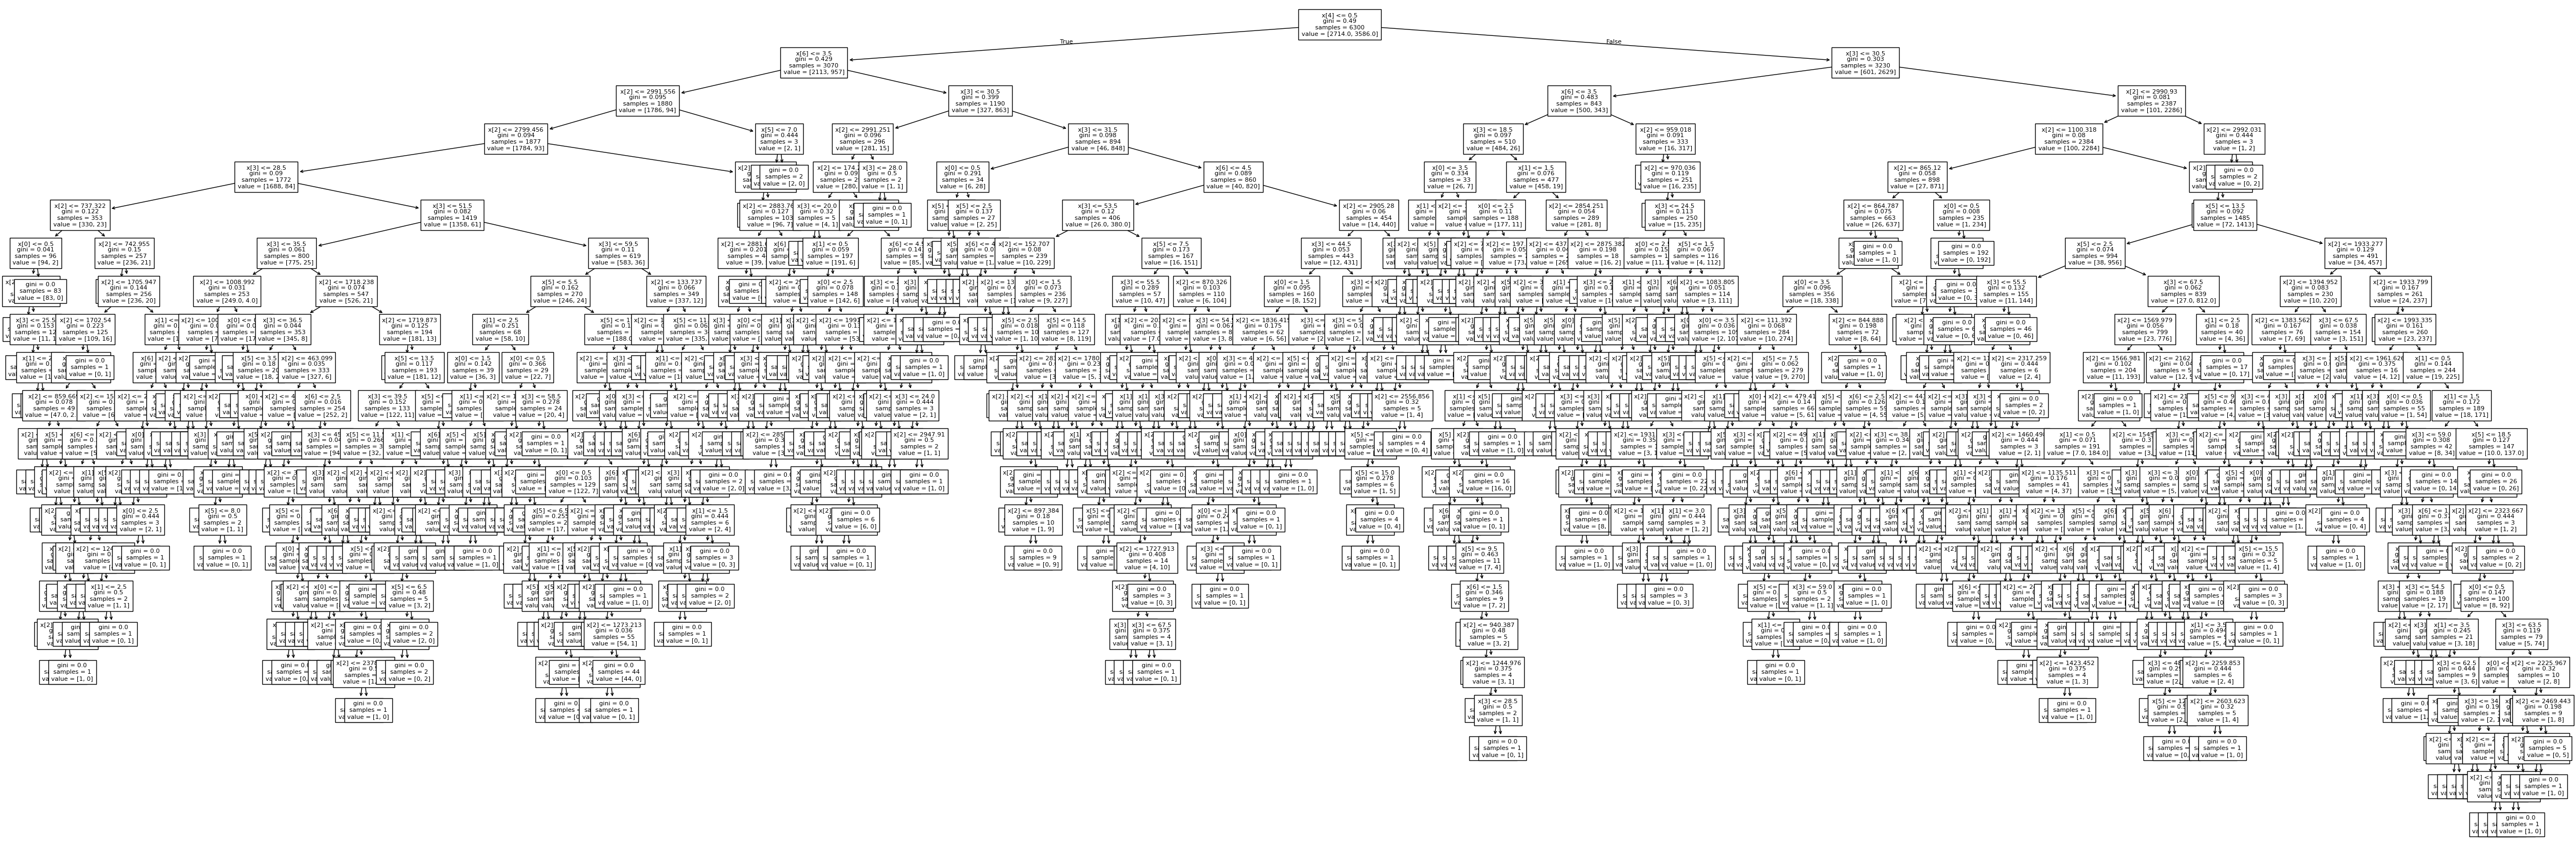

In [557]:
plt.figure(figsize=(60,20))
tree.plot_tree(DTC,fontsize = 8)
plt.show()

### <span style='color:blue'>Random Forest Classifier</span>

In [584]:
# importing library 

from sklearn.ensemble import RandomForestClassifier

In [586]:
RFC = RandomForestClassifier(n_estimators=100,random_state=42)
RFC

RandomForestClassifier(random_state=42)

In [588]:
RFC.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

#### <span style='color:purple'>Model Prediction</span>

In [590]:
y_pred = RFC.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [591]:
y_test

7940    1
1162    1
582     1
4081    0
8412    0
       ..
6764    0
1450    1
7461    1
6505    1
4927    1
Name: PurchaseIntent, Length: 2700, dtype: int64

In [592]:
error = y_test - y_pred
error

7940    0
1162    0
582     0
4081    0
8412    0
       ..
6764    0
1450    0
7461    0
6505    0
4927    0
Name: PurchaseIntent, Length: 2700, dtype: int64

#### Training Score

In [599]:
RFC.score(x_train,y_train)

1.0

#### Testing Score

In [602]:
RFC.score(x_test,y_test)

0.9540740740740741

#### Accuracy of Model

In [605]:
acc = accuracy_score(y_test,y_pred)*100
print(f"Accuracy score of Model using Decision Tree Classifier {acc:.2f}%")

Accuracy score of Model using Decision Tree Classifier 95.41%


In [608]:
print("Confusion Matrix")
confusion_matrix(y_test,y_pred) 

Confusion Matrix


array([[1112,   76],
       [  48, 1464]])

In [611]:
print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1188
           1       0.95      0.97      0.96      1512

    accuracy                           0.95      2700
   macro avg       0.95      0.95      0.95      2700
weighted avg       0.95      0.95      0.95      2700



In [628]:
dict = {'lr':0.81,
       'KNN':0.61,
       'DTC':0.90,
       'RFC':85.95}
dict

{'lr': 0.81, 'KNN': 0.61, 'DTC': 0.9, 'RFC': 85.95}

### <span style='color:red'>Observation</span>

- After performing all Classification Algorithms.
- **Decision tree** and **Random Forest** show best accuracy score.
- **Random Forest** gives the best accuracy score of **95.41%**.
- After Random forest, **Decision Tree** gives the best accuracy score of **89.52%**.
- So we can say that **Random Forest** is best for this dataset.